In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [37]:
data = pd.read_csv('/content/weather_classification_data.csv')

In [ ]:
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [ ]:
data.groupby(["Weather Type"]).count()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
Weather Type,,,,,,,,,,
Cloudy,3300,3300,3300,3300,3300,3300,3300,3300,3300,3300
Rainy,3300,3300,3300,3300,3300,3300,3300,3300,3300,3300
Snowy,3300,3300,3300,3300,3300,3300,3300,3300,3300,3300
Sunny,3300,3300,3300,3300,3300,3300,3300,3300,3300,3300


In [ ]:
sns.pairplot(data, hue='Weather Type')

Output hidden; open in https://colab.research.google.com to view.

In [39]:
print(data["Weather Type"].nunique())
print(data["Weather Type"].unique())

4
['Rainy' 'Cloudy' 'Sunny' 'Snowy']


In [40]:
data.head(5)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


Tham khảo ở đây nhé https://www.kaggle.com/code/niketasengar/weather-type-classification#Correlation-Analysis

In [47]:
# change data from 'string' to 'float'
print(data["Location"].nunique())
print(data["Location"].unique())

print(data["Cloud Cover"].nunique())
print(data["Cloud Cover"].unique())

print(data["Season"].nunique())
print(data["Season"].unique())

location_mapping = {location: idx for idx, location in enumerate(data["Location"].unique())}
cloud_cover_mapping = {cloud_cover: idx for idx, cloud_cover in enumerate(data["Cloud Cover"].unique())}
season_mapping = {season: idx for idx, season in enumerate(data["Season"].unique())}

data["Location"] = data["Location"].map(location_mapping)
data["Cloud Cover"] = data["Cloud Cover"].map(cloud_cover_mapping)
data["Season"] = data["Season"].map(season_mapping)

3
[0 1 2]
4
[0 1 2 3]
4
[0 1 2 3]


In [46]:
data.head(5)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,0,1010.82,2,0,3.5,0,Rainy
1,39.0,96,8.5,71.0,0,1011.43,7,1,10.0,0,Cloudy
2,30.0,64,7.0,16.0,1,1018.72,5,1,5.5,1,Sunny
3,38.0,83,1.5,82.0,1,1026.25,7,1,1.0,2,Sunny
4,27.0,74,17.0,66.0,2,990.67,1,0,2.5,1,Rainy


<Axes: >

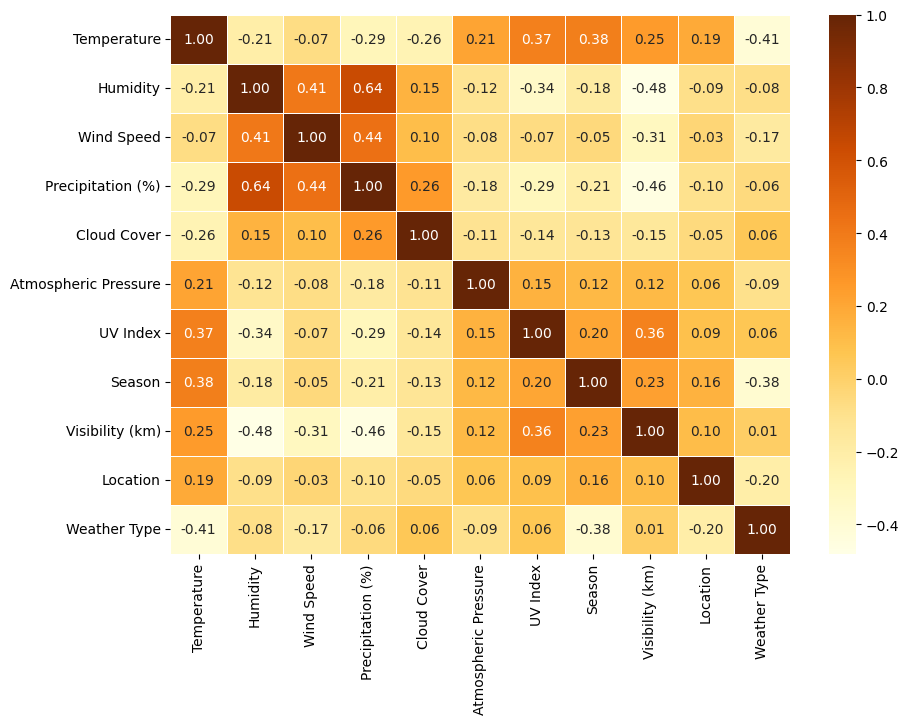

In [ ]:
plt.figure(figsize=(10,7))
corr = data.corr()
sns.heatmap(corr, annot=True, linewidths=.5, linecolor='white', cmap='YlOrBr', fmt='.2f')